### Import Python Methods

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

from acquire import get_telco_data
from prepare import prep_telco_data_explore
from prepare import prep_telco_data_model

# Data Exploration

### Estabolishing a Baseline

In [2]:
df = get_telco_data(cached = True)

In [3]:
# Churn is greater then 50 % for first 8 months of service
df = get_telco_data(cached = True)
month_one = df.tenure <= 8
test = df[month_one]
test.churn.value_counts(normalize = True)

Yes    0.505476
No     0.494524
Name: churn, dtype: float64

In [4]:
# Percent of Customers who Churned over 72 Months
df.churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [5]:
# Annual Churn per year (6 Years, aka.72 Months)

In [6]:
# Year One
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = df.tenure_years <= 1
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.525618
Yes    0.474382
Name: churn, dtype: float64

In [7]:
# Year two
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 2) & (df.tenure_years >=1)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.857143
Yes    0.142857
Name: churn, dtype: float64

In [8]:
# Year three
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 3) & (df.tenure_years >=2)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.879384
Yes    0.120616
Name: churn, dtype: float64

In [9]:
# Year four
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 4) & (df.tenure_years >=3)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.903604
Yes    0.096396
Name: churn, dtype: float64

In [10]:
# Year Five
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 5) & (df.tenure_years >=4)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.933243
Yes    0.066757
Name: churn, dtype: float64

In [11]:
# Year Six
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 6) & (df.tenure_years >=5)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.983425
Yes    0.016575
Name: churn, dtype: float64

### Takeaways so far.... 
- Overall Churn Rate All Data (6 Years or 72 Months): 27%
- Churn Rate for 1st 8 Months > 50%
- Churn Rate for 1st Year: 47%, drops drastically after year one

# Identifying Churn Drivers

In [12]:
# Cleaned Data for Exploration
df_explore= prep_telco_data_explore(get_telco_data(cached = True))

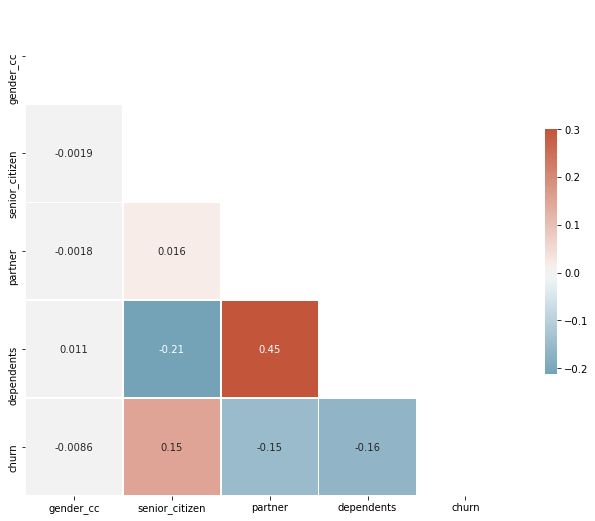

In [13]:
# Identify features to explore (Part One)
explore_heatmat = df_explore[['gender_cc', 'senior_citizen', 'partner', 'dependents', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- gender = Not a churn driver
- senior_citizen = 0.15 +
- partner = 0.15 -
- dependents = 0.16 -

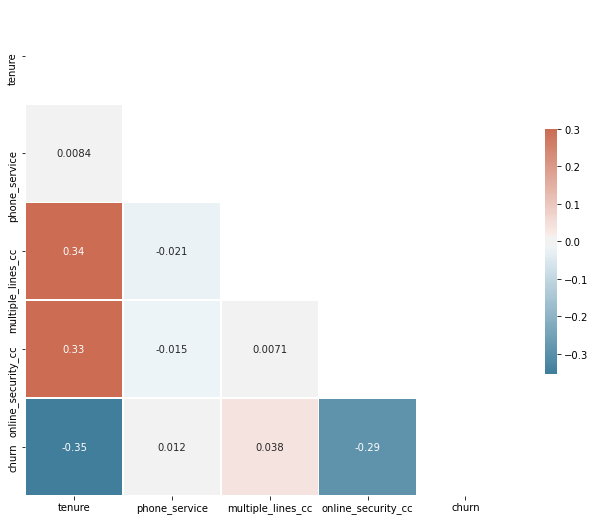

In [14]:
# Identify features to explore (Part Two)
explore_heatmat = df_explore[['tenure', 'phone_service', 'multiple_lines_cc', 'online_security_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- tenure = 0.35 -
- phone_service = Not a churn driver
- multiple lines = Not a churn driver
- online_security = 0.29 -

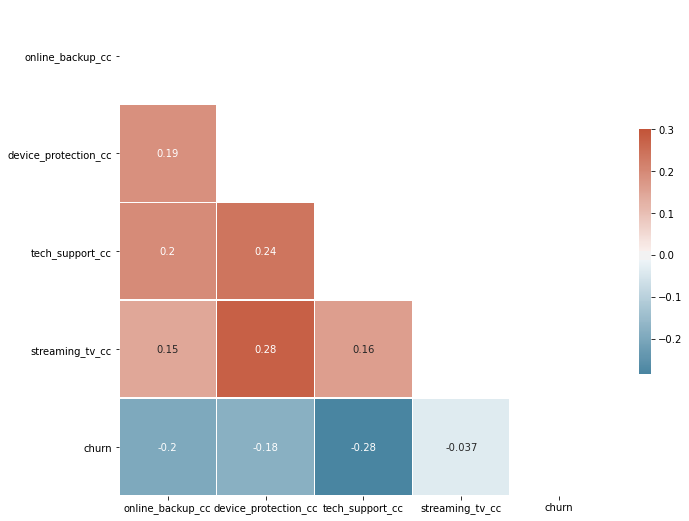

In [15]:
# Identify features to explore (Part Three)
explore_heatmat = df_explore[['online_backup_cc', 'device_protection_cc', 'tech_support_cc', 'streaming_tv_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- streaming_tv = Not a churn driver

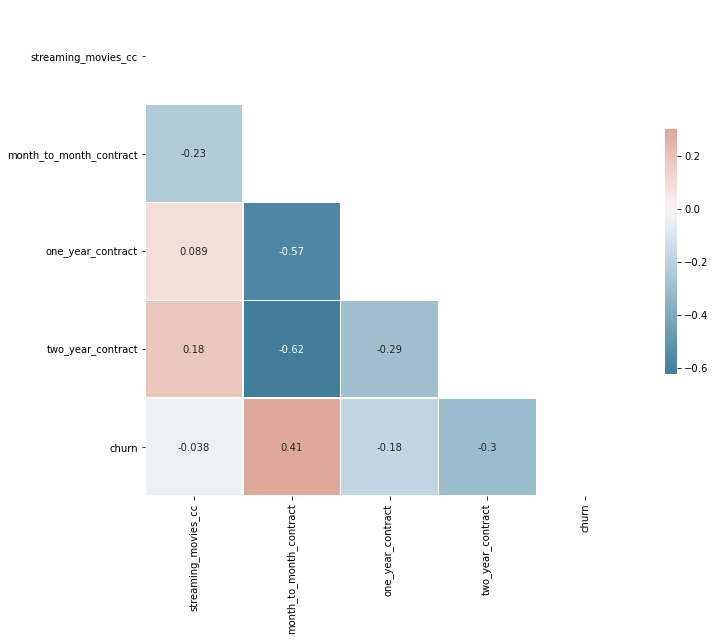

In [16]:
# Identify features to explore (Part Four)
explore_heatmat = df_explore[['streaming_movies_cc', 'month_to_month_contract', 'one_year_contract', 'two_year_contract', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- streaming_movies = Not a churn driver
- month_to_month_contract = 0.41 +
- one_year_contract = 0.18 -
- two_year_contract = 0.30 -

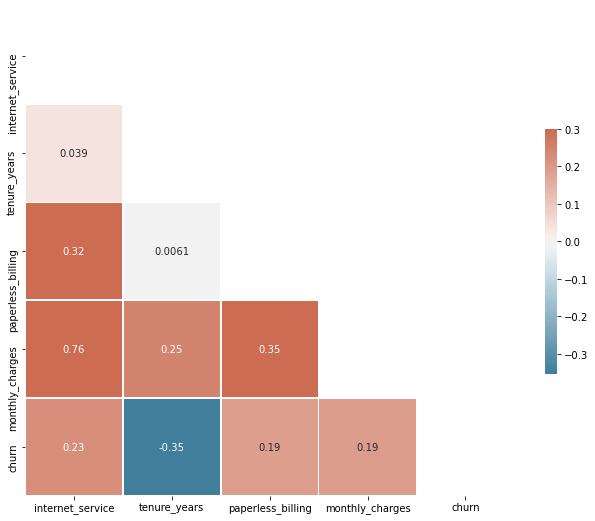

In [17]:
# Identify features to explore (Part Five)
explore_heatmat = df_explore[['internet_service', 'tenure_years', 'paperless_billing', 'monthly_charges','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- internet_service = 0.23 +
- tenure_years = 0.35 -
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +

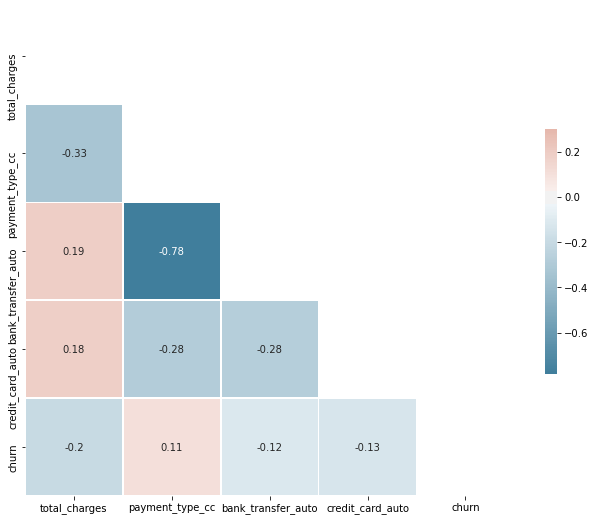

In [18]:
# Identify features to explore (Part Six)
explore_heatmat = df_explore[['total_charges', 'payment_type_cc', 'bank_transfer_auto', 'credit_card_auto','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- total_charges = 0.20 -
- payment_type = not a driver of churn
- bank_transfer = not a driver of churn
- creit_card = not a driver of churn

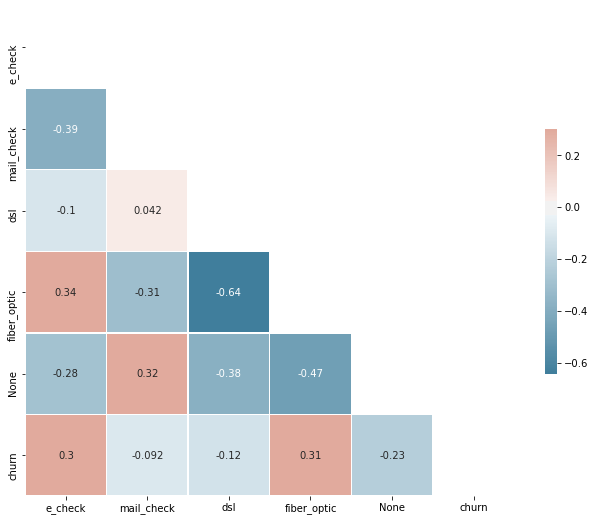

In [19]:
# Identify features to explore (Part Seven)
explore_heatmat = df_explore[['e_check','mail_check','dsl','fiber_optic','None','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- e_check = 0.30 +
- mail_check = not a driver of churn
- dsl = not a driver of churn
- fiber_optic = 0.31 +
- No interent = 0.23 -

### Total Drivers of Churn (Correlations > .15)

- senior_citizen = 0.15 +
- partner = 0.15 -
- dependents = 0.16 -
- tenure = 0.35 -
- online_security = 0.29 -
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- month_to_month_contract = .41 +
- one_year_contract = .18 -
- two_year_contract = 0.30 -
- internet_service = 0.23 +
- tenure_years = 0.35 -
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +
- total_charges = 0.20 -
- e_check = 0.30 +
- fiber_optic = 0.31 +
- No interent = 0.23 -

### Positive Drivers
- senior_citizen = 0.15 +
- month_to_month_contract = .41 +
- internet_service = 0.23 +
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +
- e_check = 0.30 +
- fiber_optic = 0.31 +

### Negative Drivers
- partner = 0.15 -
- dependents = 0.16 -
- tenure = 0.35 -
- online_security = 0.29 -
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- one_year_contract = .18 -
- two_year_contract = 0.30 -
- tenure_years = 0.35 -
- total_charges = 0.20 -
- No interent = 0.23 -

# Final Takeaways

- Contract Type, Internet Service, and Tenure are the 3 Largest Drives Churn (+ and -)
- Leads me to create two hypotheses that might help to keep customers from leaving telco:
  - Hypothesis One: There is a difference in churn rate between internet service options, and will test this hypothesis with a Chi Squared Test.
  - Hypothesis Two: Of those with internet service, customers who utilize tech_support are less likely to churn.  

# Statistical Testing

## Hypothesis One: Churn is affected by internet service type

$H_{0}$: Whether a person churns is independent of internet service type

$H_{a}$: Whether a person churns is not independent of internet service type

In [20]:
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [21]:
#Sort service type and eliminate none before crosstab
dsl_fiber = df_explore.internet_service_type != 'None'
df_dsl_fiber = df_explore[dsl_fiber]

In [22]:
ctab = pd.crosstab(df_dsl_fiber.churn, df_dsl_fiber.internet_service_type)
ctab

internet_service_type,DSL,Fiber optic
churn,,
0,1962,1799
1,459,1297


In [23]:
# Statistical Test
Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 2.2962170975696955e-73.
Our p-value is less than our alpha: True


#### Findings:
P-value is less than alpha so we reject the null hypothesis, ie. Our 𝑥2 test informs us that the two categories, churn and internet service, are not independent.

## Hypothesis Two: Churn is affected by tech support

$H_{0}$: Whether a person churns is independent of tech support

$H_{a}$: Whether a person churns is not independent of tech support

In [24]:
# Set alpha for hypothesis test
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [25]:
# Sort tech support and eliminate 'no internet service' before crosstab
df_support = df_explore.tech_support != 'No internet service'
df_support_final = df_explore[df_support]

In [26]:
ctab = pd.crosstab(df_support_final.churn, df_support_final.tech_support)
ctab

tech_support,No,Yes
churn,,
0,2027,1734
1,1446,310


In [27]:
Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 4.35191667899426e-92.
Our p-value is less than our alpha: True


#### Findings:
P-value is less than alpha so we reject the null hypothesis, ie. Our 𝑥2 test informs us that the two categories, churn and tech support, are not independent.

# Modeling: Predicting Churn

#### General Assumptions
- For my models the dummy assessment of churn will be 50%.  This is greater then the overall churn for the data set, but equivilent to the amount of churn seen in the first 8 months of service when customer identification and intervention are greatest
- 7 Features Identified as Large Positive Churn Drivers
- 12 Features Identfied as Large Negative Churh Drivers
- I am going to build my first models using top 5 positive and top 5 negative drivers of churn

In [28]:
#Importing modeling data set (w/scaled values)
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))

In [29]:
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_cc,...,e_check,mail_check,month_to_month_contract,one_year_contract,two_year_contract,internet_service,dsl,fiber_optic,None,tenure_years
5670,0,0,1,0.069444,1,0,0.020927,0.014048,0,1,...,0,0,1,0,0,0,0,0,1,0.070000
4152,0,0,0,0.083333,1,1,0.707524,0.056081,0,0,...,1,0,1,0,0,1,0,1,0,0.083333
4890,0,0,0,0.750000,1,0,0.659193,0.516310,0,1,...,1,0,0,1,0,1,0,1,0,0.750000
2391,0,1,0,1.000000,1,0,0.463378,0.553237,0,0,...,0,0,0,0,1,1,1,0,0,1.000000
2896,0,1,0,0.388889,1,0,0.580967,0.237818,0,1,...,0,0,1,0,0,1,0,1,0,0.388333


# Logistic Regression Model

In [42]:
# Logistic Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_1 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Log Function
log = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
log.fit(X_train_1, y_train)

# make a prediction with traning data
y_pred_1 = log.predict(X_train_1)
# estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_train_1)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(log.score(X_train_1, y_train)))
print(classification_report(y_train, y_pred_1))

Accuracy of Logistic Classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2897
           1       0.65      0.51      0.57      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.71      0.72      3943
weighted avg       0.79      0.80      0.79      3943



#### Findings:
- 80% Accuracy no matter what adjustments were made to model parameters

# Decision Tree Model

In [48]:
# Decision Tree Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_2 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Decision Tree Function
clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf.fit(X_train_2, y_train)

#make a prediction with traning data
y_pred_2 = clf.predict(X_train_2)
#estimate prob of churn with training data
y_pred_proba_2 = clf.predict_proba(X_train_2)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(clf.score(X_train_2, y_train)))
print(classification_report(y_train, y_pred_2))

Accuracy of Logistic Classifier on training set: 0.88
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2897
           1       0.80      0.74      0.77      1046

    accuracy                           0.88      3943
   macro avg       0.85      0.84      0.84      3943
weighted avg       0.88      0.88      0.88      3943



#### Findings:
- with max_depth of 3 equivlent accuracy, worse recally for positive churn
- with max_depth of 10 better accuracy, better recally and f1 score

# Random Forrest Model

In [57]:
# Random Forrest Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_3 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Random Forrest Function
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rf.fit(X_train_3, y_train)

#make a prediction with traning data
y_pred_3 = rf.predict(X_train_3)
#estimate prob of churn with training data
y_pred_proba_3 = rf.predict_proba(X_train_3)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(rf.score(X_train_3, y_train)))
print(classification_report(y_train, y_pred_3))

Accuracy of Logistic Classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.74      0.55      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



#### Findings
- No Matter how I fine tune the function it does not give me the f1 score I am looking for

# KNN Model

In [64]:
# KNN Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_4 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Random Forrest Function
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train_4, y_train)

#make a prediction with traning data
y_pred_4 = knn.predict(X_train_4)
#estimate prob of churn with training data
y_pred_proba_4 = knn.predict_proba(X_train_4)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(knn.score(X_train_4, y_train)))
print(classification_report(y_train, y_pred_4))

Accuracy of Logistic Classifier on training set: 0.84
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2897
           1       0.75      0.61      0.67      1046

    accuracy                           0.84      3943
   macro avg       0.81      0.77      0.78      3943
weighted avg       0.84      0.84      0.84      3943



#### Findings:
- with n =5, good accuracy(.84) and f1 score (.67)

## Validate Data: (3 Top Models)

In [ ]:
# Train models on validate

X_validate_1 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
X_validate_2 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
X_validate_4 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_validate = validate.survived

#make a prediction with validate data
y_pred_1 = log.predict(X_validate_1)
y_pred_2 = cff.predict(X_validate_2)
y_pred_4 = knn.predict(X_validate_4)

#estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_validate_1)
y_pred_proba_2 = cff.predict_proba(X_validate_2)
y_pred_proba_4 = knn.predict_proba(X_validate_4)